<a href="https://colab.research.google.com/github/minonza/datatrained_projects/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading Important libraries.......
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Importing some metrics we can use to evaluate our model performance. 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the csv file......
df_advertising=pd.read_csv('/content/drive/MyDrive/advetising.csv',)
df_advertising

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# Dropping the Unnamed column because it is just like index............
df_advertising.drop(['Unnamed: 0'],axis=1,inplace=True)
df_advertising

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**EDA**

In [4]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 200 rows and 4 columns.
df_advertising.shape

(200, 4)

In [5]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df_advertising.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [6]:
# Printed the last 10 rows of the dataset...........
df_advertising.tail(10)

,TV,radio,newspaper,sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,9.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
# Statistical Features Information
df_advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# checking the Features information regarding the dataset
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# Checking the unique values
for col in df_advertising.columns.values:
    print("Number of unique values of{} :{} ".format(col,df_advertising[col].nunique()))

Number of unique values ofTV :190 
Number of unique values ofradio :167 
Number of unique values ofnewspaper :172 
Number of unique values ofsales :121 


In [10]:
# checking the Data types.
df_advertising.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

TV              AxesSubplot(0.125,0.799681;0.352273x0.0803191)
radio        AxesSubplot(0.547727,0.799681;0.352273x0.0803191)
newspaper       AxesSubplot(0.125,0.703298;0.352273x0.0803191)
sales        AxesSubplot(0.547727,0.703298;0.352273x0.0803191)
dtype: object

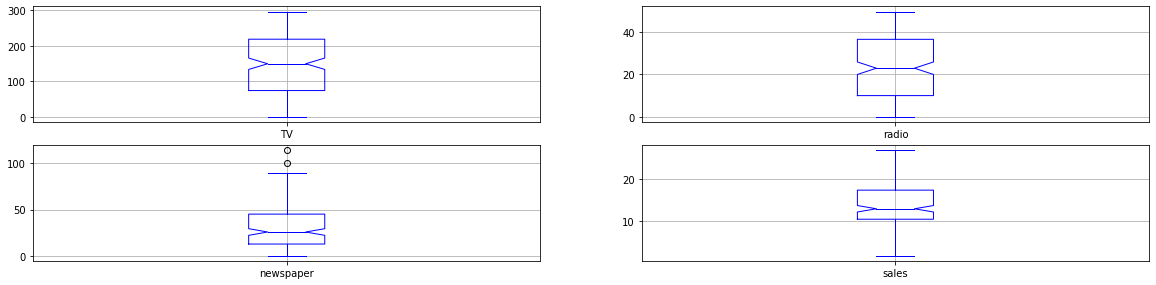

In [11]:
df_advertising.plot(kind='box', subplots=True, layout=(8,2),figsize=(20,20),grid=True,notch=True,color='blue' ,legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28ce661490>,
      dtype=object)

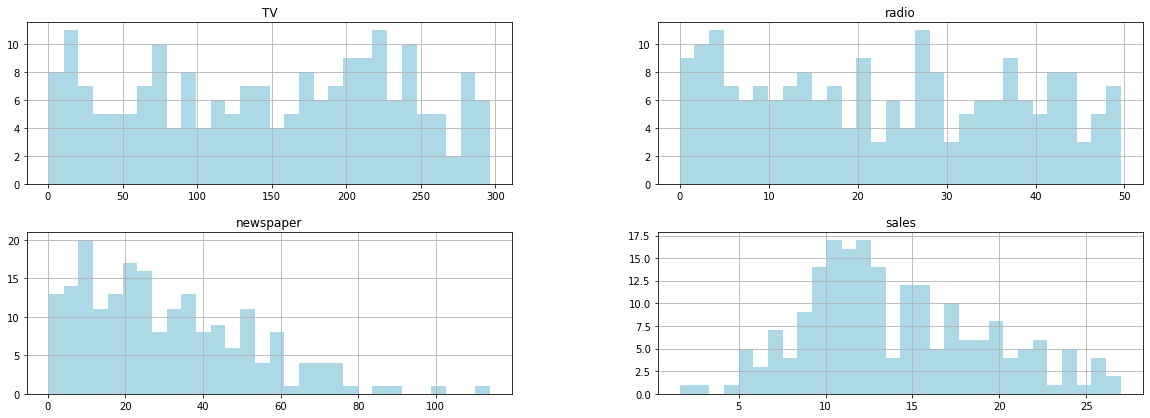

In [12]:
df_advertising.hist(figsize=(20,30),grid=True,layout=(8,2),bins=30,color='lightblue')

Text(0.5, 0, 'TV')

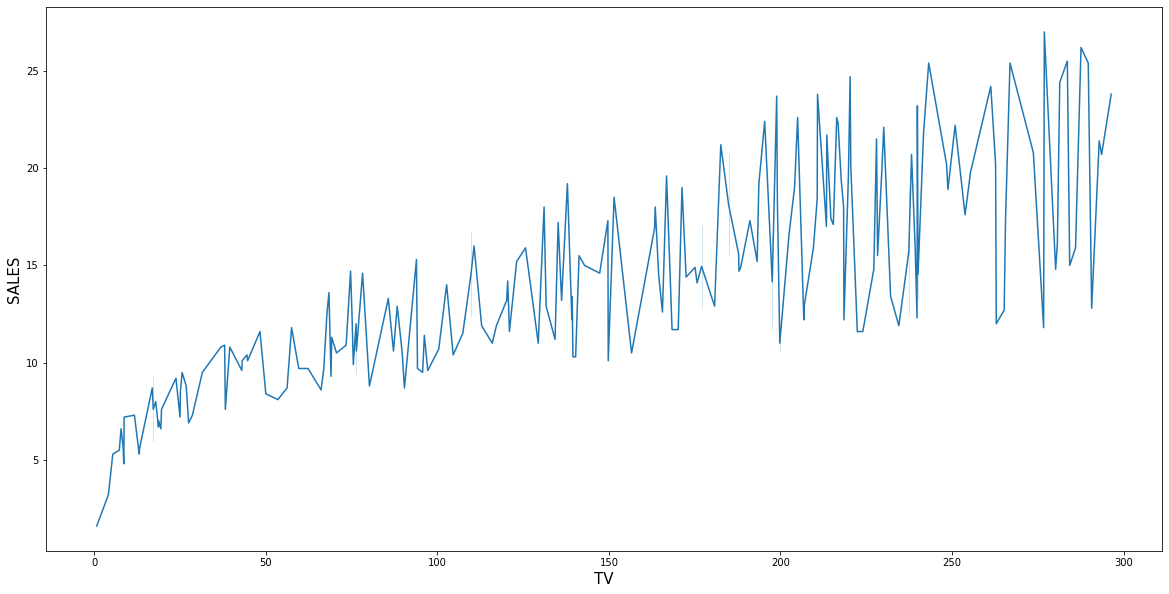

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(x='TV',y='sales',data=df_advertising,)
plt.ylabel('SALES' ,fontsize=15)
plt.xlabel('TV' ,fontsize=15)
# sales increases as our expenditure on TV Advertisement increases.

Text(0.5, 0, 'RADIO')

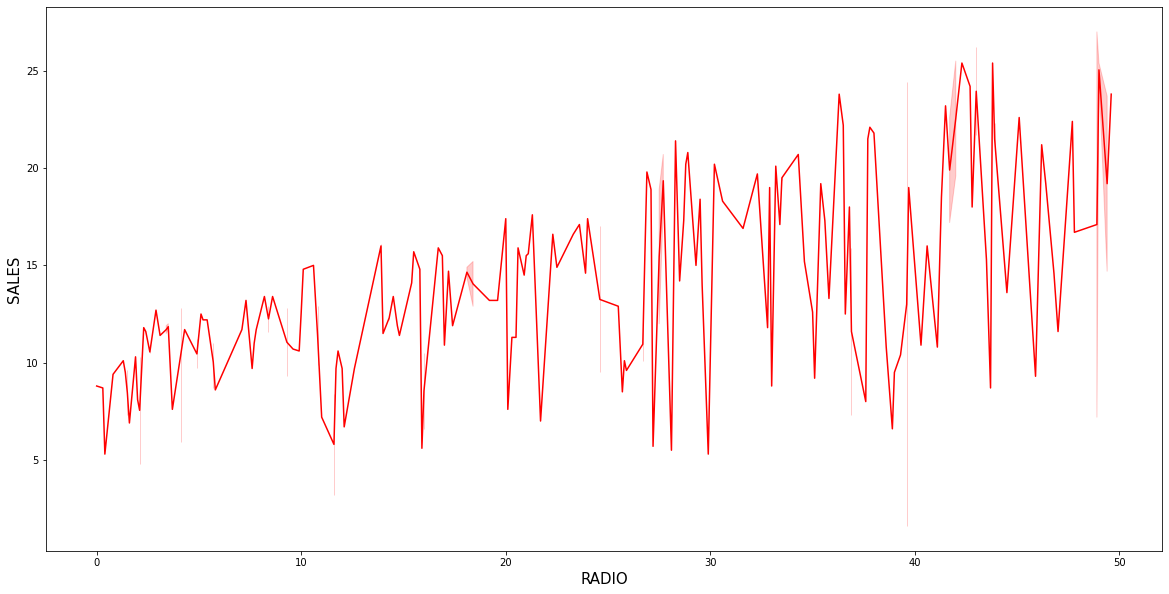

In [14]:
plt.figure(figsize=(20,10))
sns.lineplot(x='radio',y='sales',data=df_advertising,color='red')
plt.ylabel('SALES' ,fontsize=15)
plt.xlabel('RADIO' ,fontsize=15)

Text(0.5, 0, 'NEWSPAPER')

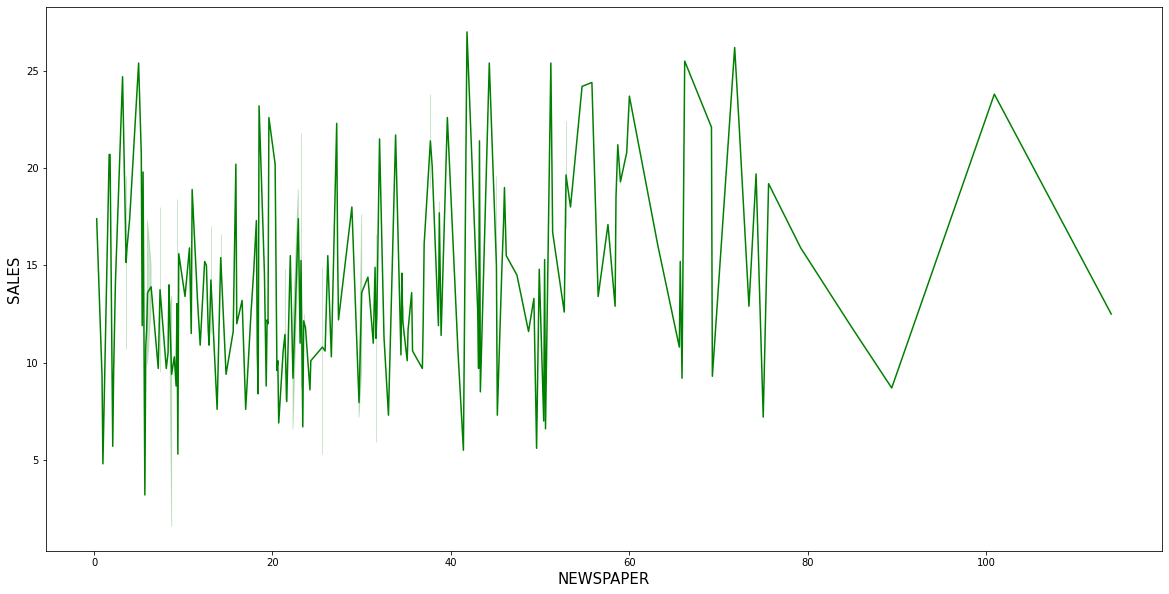

In [15]:
plt.figure(figsize=(20,10))
sns.lineplot(x='newspaper',y='sales',data=df_advertising,color='green')
plt.ylabel('SALES' ,fontsize=15)
plt.xlabel('NEWSPAPER' ,fontsize=15)

<function matplotlib.pyplot.tight_layout>

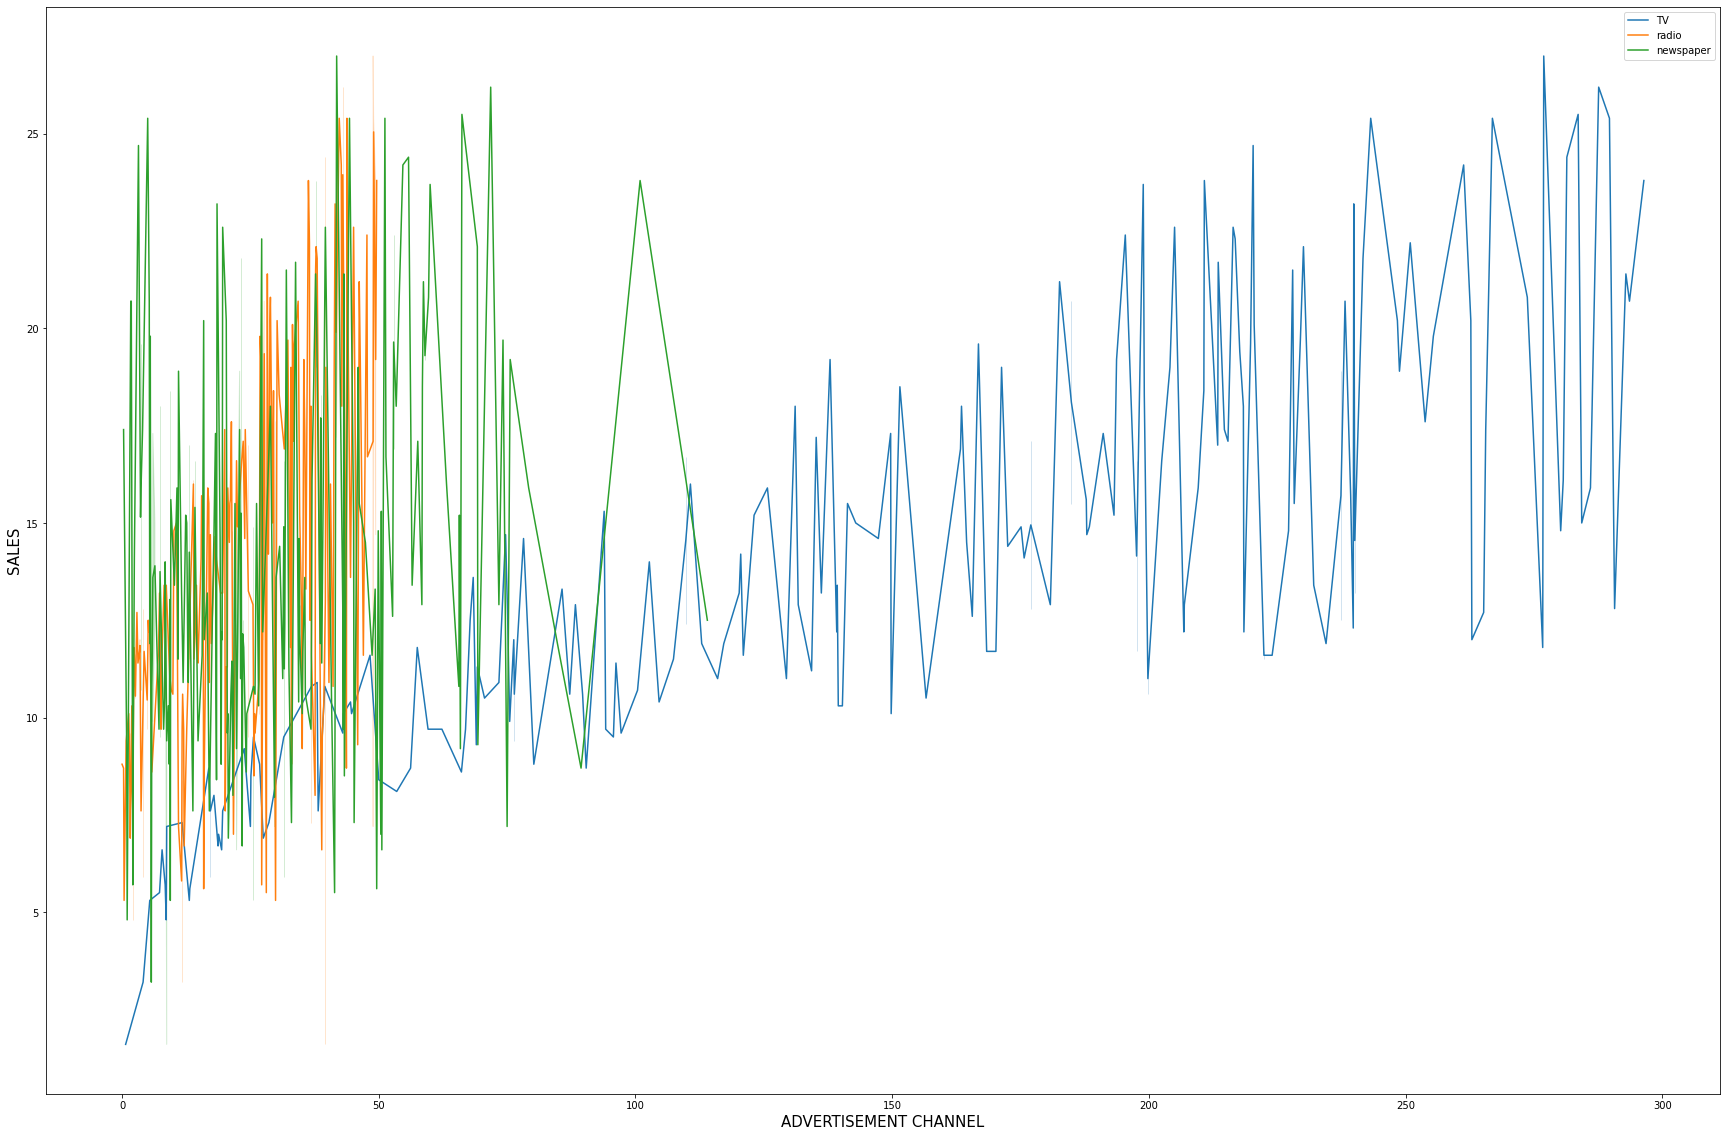

In [16]:
s=df_advertising.drop(['sales'],axis=1).columns.values
plt.figure(figsize=(30,20))
sns.lineplot(x='TV',y='sales',data=df_advertising)
sns.lineplot(x='radio',y='sales',data=df_advertising)
sns.lineplot(x='newspaper',y='sales',data=df_advertising)
plt.legend(s)
plt.ylabel('SALES' ,fontsize=15)
plt.xlabel('ADVERTISEMENT CHANNEL' ,fontsize=15)
plt.tight_layout

Conclusion from the graph......
1) Company is spending more money in TV advertisement.
2) Spending more money in newspaper is not helping in increasing sales, thus if we reduce our expenditure on Newspaper advertisement then sales are not gonna affected much.
3) Thus to increase sales we have to focus more on TV advertisement then on radio advertisement.

In [17]:
df_advertising.groupby(['sales']).mean()

,TV,radio,newspaper
sales,,,
1.6,0.70,39.600000,8.7
3.2,4.10,11.600000,5.7
4.8,8.60,2.100000,1.0
5.3,9.25,15.150000,17.5
5.5,7.30,28.100000,41.4
...,...,...,...
24.7,220.30,49.000000,3.2
25.4,266.60,45.033333,33.5
25.5,283.60,42.000000,66.2


In [18]:
a=df_advertising.mean()
a

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

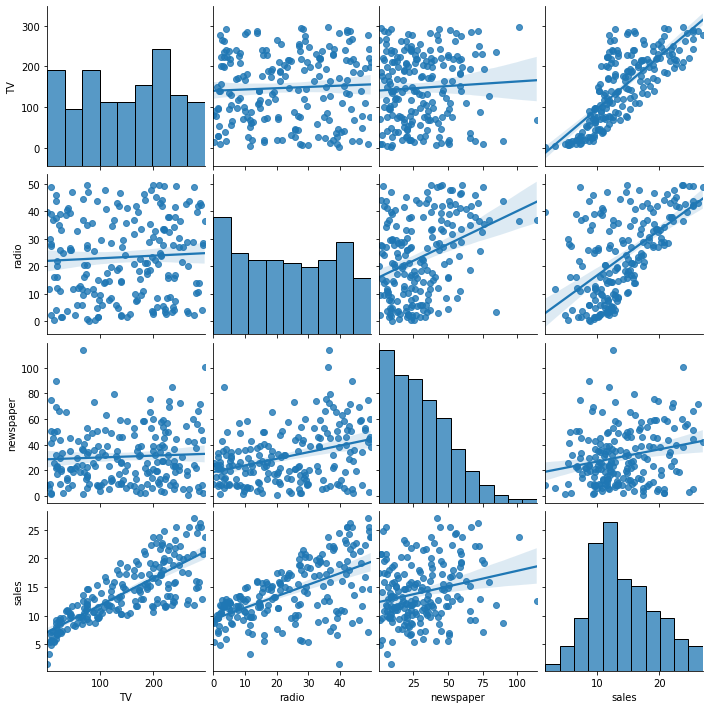

In [19]:
sns.pairplot(df_advertising,kind='reg')

Conclusion from pairplot:
1) TV has very strong relationship with the sales.
2) Radio have strong correlation with the sales.
3) Newspaper have weak correlaton with the sales.

In [20]:
# Checking the correlation
corr=df_advertising.corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(2)
# children are having very weak correlation with the target value.

,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


In [21]:
df_advertising.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [22]:
# Removing Skewness
for i in df_advertising.columns:
    if df_advertising.skew().loc[i]>0.55:
        df_advertising[i]=np.log1p(df_advertising[i])

In [23]:
df_advertising.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df_advertising))
print(df_advertising.shape)
df_new=df_advertising.loc[(z<3).all(axis=1)]
print(df_new.shape)

(200, 4)
(199, 4)


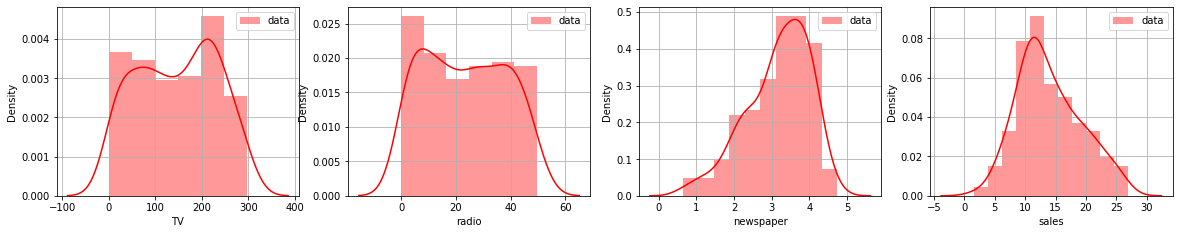

In [25]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_new[col],color='red',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [26]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['sales',],axis=1)
x1
print(x1.shape)

(199, 3)


In [27]:
# Setting up the Target value in variable y.
y=df_new['sales']
y.shape

(199,)

In [28]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,TV,radio,newspaper
0,0.979090,0.978080,1.287306
1,-1.193199,1.079124,0.787741
2,-1.512722,1.523719,1.288997
3,0.059144,1.213850,1.090856
4,0.402076,-0.840714,1.088858
...,...,...,...
194,-1.266935,-1.318990,-0.561964
195,-0.611503,-1.238155,-1.139716
196,0.357600,-0.941758,-1.385372
197,1.605262,1.261004,1.235424


In [30]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,cv):
    clf = GridSearchCV(mod,parameters, cv=5)
    clf.fit(x,y)
    print(clf.best_params_)


In [31]:
SV=SVR()
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters={'C': Cs, 'gamma' : gammas}
grid_cv(SV,parameters,5)

{'C': 10, 'gamma': 0.1}


In [32]:
#     Grid Search for KNeighborsRegressor
knr=KNeighborsRegressor()
parameters={"n_neighbors":np.arange(1,30)}
grid_cv(knr,parameters,10)

{'n_neighbors': 4}


In [33]:
#     Grid Search for Lasso
ls=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
grid_cv(ls,parameters,10)

{'alpha': 0.1}


In [34]:
#           Defining Instances For Differnt Models.
KNR=KNeighborsRegressor(n_neighbors=4)
SV=SVR(C=10,gamma=0.1)
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor(max_depth=2, random_state=0)
GBR=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
ABR=AdaBoostRegressor()
LS=Lasso(alpha=0.1)
RD=Ridge()
EN=ElasticNet()

In [35]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))

In [36]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state

In [37]:
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
# .....................Create a function to fit and score models.....
# .....................Make a dictionary to keep model scores.....
model_r_scores = {}
#Loop through models
#.......................For Loop to Calculate R_2 Score, Cross Val Score........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
#....................Now here I am calling a function which will calculate the max accuracy score for each model........ 
#                   ..................and return best random state....
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r_state,)
    model.fit(x_train,y_train)
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    cv_score=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
    #.....................Mean Square Error.....   
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squarred Error : ', mse)
    MSE.append(mse*100)
    print('\n')
#.....................Root Mean Square Error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squarred Error : ', rmse)
    RMSE.append(rmse*100)
    print('\n')

*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')


max r2 score corresponding to 43 is: 0.9673256089320095
Learning Score :  0.954237090684201
R2 Score :  0.9673256089320095


Cross Val Score :  0.9331364580370701


Mean Squarred Error :  0.8438500000000004


Root Mean Squarred Error :  0.91861308503635


*************************** SVR *****************************


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 61 is: 0.9909051326404983
Learning Score :  0.9794646480713028
R2 Score :  0.9909051326404983


Cross Val Score :  0.9753610962102446


Mean Squarred Error :  0.19309789462007626


Root Mean Squarred Error :  0.43942905527522447


*******

In [38]:
#..................Creating DataFrame comprises of Different Scores..............
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE})  
result

,Model,Learning Score,R2_score,Cross_Val_Score,Mean_squared_error,Root_Mean_squared_error
0,KNeighborsRegressor,95.423709,96.732561,93.313646,84.385000,91.861309
1,SVR,97.946465,99.090513,97.536110,19.309789,43.942906
2,LinearRegression,88.199147,93.473762,88.720056,161.091708,126.921908
3,DecisionTreeRegressor,100.000000,97.583947,95.573737,92.300000,96.072889
4,RandomForestRegressor,86.919079,89.581188,83.182248,323.702028,179.917211
5,GradientBoostingRegressor,99.881537,98.944843,97.700341,29.813241,54.601502
6,AdaBoostRegressor,97.816424,97.617368,95.385356,61.533947,78.443577
7,Lasso,88.116354,93.145192,88.829863,169.202036,130.077683
8,Ridge,88.195594,93.394501,88.727767,163.048144,127.690306
9,ElasticNet,75.427048,79.588340,73.327624,374.748607,193.584247


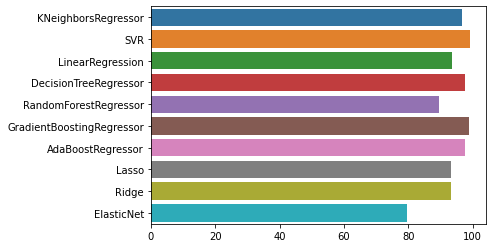

In [39]:
# visualisation of R2 Score.....
sns.barplot(y=Model,x=R2_score)

In [40]:
# Using SVR for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61,test_size=.25,)
svr=SVR(C=10,gamma=0.1)
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
svrpred=svr.predict(x_test)
print('R2 Score : ',r2_score(y_test,svrpred))
print('Mean Squarred Error : ',mean_squared_error(y_test,svrpred))
print('Root Mean Squarred Error : ',np.sqrt(mean_squared_error(y_test,svrpred)))

R2 Score :  0.9909051326404983
Mean Squarred Error :  0.19309789462007626
Root Mean Squarred Error :  0.43942905527522447


In [41]:
# Printing predicted values
test=pd.DataFrame(data=y_test)
test['Predicted values']=svrpred
test
# On the left side values are those which are taken by machine for test...

,sales,Predicted values
86,12.0,11.710492
63,14.0,13.523741
87,16.0,15.697225
170,8.4,8.703376
129,9.7,9.321298
14,19.0,19.410225
3,18.5,18.514846
23,15.5,15.517652
71,12.4,11.691448
161,13.3,13.386459


In [42]:
# Saving the Predicted values in csv file
test.to_csv('Project_6_Advertising.csv',index=False)

In [43]:
# Dumping Data in pickle file.Loading predicted values.
from sklearn.externals import joblib
joblib.dump(svr,'Project_6_Advertising.pkl')

['Project_6_Advertising.pkl']

In [44]:
#Loading predicted values.
final=joblib.load('Project_6_Advertising.pkl')
final.predict(x_test)

array([11.71049236, 13.52374102, 15.69722534,  8.70337559,  9.32129796,
       19.41022534, 18.51484572, 15.5176521 , 11.69144845, 13.38645917,
       25.34931493, 17.57082716, 17.38123245, 10.9079846 , 19.52739879,
       19.22553342, 13.18114901, 20.98259478, 15.9552868 , 13.48169552,
       22.56351446, 12.87847678, 15.70398946,  8.92989926, 19.50089693,
       11.13629553, 21.12859486,  9.60232529, 17.17092075, 17.7174799 ,
       23.16200689,  7.15717463,  8.58243993, 12.68446586, 22.544604  ,
        7.54525658, 15.59597867, 11.76591919,  9.16604102, 11.55313711,
       22.93328086, 11.5142498 , 18.52731061, 15.52253597,  8.18972354,
       14.46215825,  8.67381616, 15.25122883, 15.58387869, 17.501267  ])